In [60]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [61]:
prom_train = pd.read_csv('train.csv')
prom_train.head(4)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0


In [62]:
prom_train['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [63]:
#from sklearn.utils import resample

# Separate majority and minority classes
#prom_train_majority = prom_train[prom_train.Promoted_or_Not==0]
#prom_train_minority = prom_train[prom_train.Promoted_or_Not==1]
 
# Upsample minority class
#prom_train_minority_upsampled = resample(prom_train_minority, 
                                # replace=True,     # sample with replacement
                                 #n_samples=35071,    # to match majority class
                                # random_state=123) # reproducible results
 
## Combine majority class with upsampled minority class
#prom_train_upsampled = pd.concat([prom_train_majority, prom_train_minority_upsampled])
 
# Display new class counts
#prom_train_upsampled.Promoted_or_Not.value_counts()

In [64]:
from sklearn.utils import resample

# Separate majority and minority classes
prom_train_majority = prom_train[prom_train.Promoted_or_Not==1]
prom_train_minority = prom_train[prom_train.Promoted_or_Not==0]
 
# Upsample minority class
prom_train_minority_upsampled = resample(prom_train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3241,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
prom_train_upsampled = pd.concat([prom_train_majority, prom_train_minority_upsampled])
 
# Display new class counts
prom_train_upsampled.Promoted_or_Not.value_counts()

1    3241
0    3241
Name: Promoted_or_Not, dtype: int64

In [65]:
prom_train = prom_train_upsampled

In [66]:
prom_train = prom_train.reset_index(drop=True)

In [67]:
prom_train.head(4)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00012,Commercial Sales and Marketing,First Degree or HND,Female,Direct Internal process,2,1986,12.5,2016,1,0,42,LAGOS,Yes,Married,No,No,0,1
1,YAK/S/00061,Commercial Sales and Marketing,"MSc, MBA and PhD",Male,Agency and others,2,1971,10.0,2002,1,0,39,IMO,Yes,Married,No,No,1,1
2,YAK/S/00068,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1994,0.0,2018,0,0,53,ENUGU,No,Married,No,No,0,1
3,YAK/S/00070,Information and Strategy,First Degree or HND,Male,Agency and others,2,1991,7.5,2012,1,0,76,GOMBE,No,Married,No,No,0,1


In [68]:
prom_train.shape

(6482, 19)

In [69]:
prom_train.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
Promoted_or_Not                          int64
dtype: object

In [70]:
#Create a label encoder object
le = LabelEncoder()

# Since most columns have 2 values i.e. Yes or No
le_count = 0
for col in prom_train.columns[1:]:
    if prom_train[col].dtype == 'object':
        if len(list(prom_train[col].unique())) <= 2:
            le.fit(prom_train[col])
            prom_train[col] = le.transform(prom_train[col])
            le_count += 1
            print(col)
print('{} columns were label encoded.'.format(le_count)) 

Gender
Foreign_schooled
Past_Disciplinary_Action
Previous_IntraDepartmental_Movement
4 columns were label encoded.


In [71]:
# convert rest of categorical variable into dummy
prom_train.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00012,Commercial Sales and Marketing,First Degree or HND,0,Direct Internal process,2,1986,12.5,2016,1,0,42,LAGOS,1,Married,0,0,0,1
1,YAK/S/00061,Commercial Sales and Marketing,"MSc, MBA and PhD",1,Agency and others,2,1971,10.0,2002,1,0,39,IMO,1,Married,0,0,1,1


In [72]:
prom_train.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                   int32
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                         int32
Marital_Status                          object
Past_Disciplinary_Action                 int32
Previous_IntraDepartmental_Movement      int32
No_of_previous_employers                object
Promoted_or_Not                          int64
dtype: object

In [73]:
prom_train['Region'] = prom_train['State_Of_Origin']
prom_train['Region'].replace(['LAGOS', 'OGUN', 'OYO', 'ONDO', 'EKITI', 'OSUN'], 'SW', inplace=True)
prom_train['Region'].replace(['ABIA', 'ANAMBRA', 'EBONYI', 'ENUGU', 'IMO'], 'SE', inplace=True)
prom_train['Region'].replace(['RIVERS', 'DELTA', 'EDO', 'AKWA IBOM', 'BAYELSA', 'CROSS RIVER'], 'SS', inplace=True)
prom_train['Region'].replace(['FCT', 'NIGER', 'PLATEAU', 'KWARA', 'KOGI', 'BENUE', 'NASSARAWA'], 'NC', inplace=True)
prom_train['Region'].replace(['KANO', 'KADUNA', 'KATSINA', 'JIGAWA', 'KEBBI', 'ZAMFARA', 'SOKOTO'], 'NW', inplace=True)
prom_train['Region'].replace(['ADAMAWA', 'BAUCHI', 'BORNO', 'YOBE', 'GOMBE', 'TARABA'], 'NE', inplace=True)

In [74]:
prom_train["Qualification"].replace(np.nan,"Missing", inplace=True)

In [75]:
prom_train['Qualification'].value_counts()

First Degree or HND         4286
MSc, MBA and PhD            1845
Missing                      232
Non-University Education     119
Name: Qualification, dtype: int64

In [76]:
prom_train['No_of_previous_employers'].value_counts()

1              3210
0              2258
2               344
3               240
4               219
5               144
More than 5      67
Name: No_of_previous_employers, dtype: int64

In [77]:
prom_train['Trainings_Attended'].value_counts()

2    5319
3     911
4     189
5      44
6      12
7       4
8       2
9       1
Name: Trainings_Attended, dtype: int64

In [78]:
prom_train['Last_performance_score'].value_counts()

7.5     2015
12.5    1965
10.0    1143
0.0      511
2.5      452
5.0      396
Name: Last_performance_score, dtype: int64

In [79]:
prom_train['Qualification'].replace('Non-University Education', int(1), inplace=True)
prom_train['Qualification'].replace('Missing', int(2), inplace=True)
prom_train['Qualification'].replace('First Degree or HND', int(2), inplace=True)
prom_train['Qualification'].replace('MSc, MBA and PhD', int(3), inplace=True)
#prom_train['Qualification'].fillna(prom_train['Qualification'].median(), inplace=True)

In [80]:
prom_train['Qualification'].value_counts()

2    4518
3    1845
1     119
Name: Qualification, dtype: int64

In [81]:
# drop original column 'Year_of_birth', 'EmployeeNo' and 'Year_of_recruitment'from "prom_train"
prom_train.drop(['EmployeeNo', 'State_Of_Origin'] , axis = 1, inplace=True)

In [82]:
#Create a label encoder object
le = LabelEncoder()

# Since most columns have 2 values i.e. Yes or No
le_count = 0
for col in prom_train.columns[1:]:
    if prom_train[col].dtype == 'object':
        if len(list(prom_train[col].unique())) > 2:
            le.fit(prom_train[col])
            prom_train[col] = le.transform(prom_train[col])
            le_count += 1
            print(col)
print('{} columns were label encoded.'.format(le_count)) 

Channel_of_Recruitment
Marital_Status
No_of_previous_employers
Region
4 columns were label encoded.


In [83]:
le = LabelEncoder()
le.fit(prom_train['Division'])
prom_train['Division'] = le.transform(prom_train['Division']).astype(int)
prom_train['Division'].head(3)

0    1
1    1
2    1
Name: Division, dtype: int32

In [84]:
prom_train.dtypes

Division                                 int32
Qualification                            int64
Gender                                   int32
Channel_of_Recruitment                   int32
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
Foreign_schooled                         int32
Marital_Status                           int32
Past_Disciplinary_Action                 int32
Previous_IntraDepartmental_Movement      int32
No_of_previous_employers                 int32
Promoted_or_Not                          int64
Region                                   int32
dtype: object

In [85]:
prom_train.head(2)

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Region
0,1,2,0,1,2,1986,12.5,2016,1,0,42,1,0,0,0,0,1,5
1,1,3,1,0,2,1971,10.0,2002,1,0,39,1,0,0,0,1,1,3


In [86]:
prom_train['Age'] = float(2019) - prom_train['Year_of_birth'].astype('float')
prom_train['Length_of_Service'] = float(2019) - prom_train['Year_of_recruitment'].astype('float')

In [87]:
# drop original column 'Year_of_birth', 'EmployeeNo' and 'Year_of_recruitment'from "prom_train"
prom_train.drop(['Year_of_birth', 'Year_of_recruitment'] , axis = 1, inplace=True)

In [88]:
prom_train.head().T

,0,1,2,3,4
Division,1.0,1.0,1.0,4.0,1.0
Qualification,2.0,3.0,2.0,2.0,3.0
Gender,0.0,1.0,1.0,1.0,1.0
Channel_of_Recruitment,1.0,0.0,1.0,0.0,1.0
Trainings_Attended,2.0,2.0,2.0,2.0,2.0
Last_performance_score,12.5,10.0,0.0,7.5,10.0
Targets_met,1.0,1.0,0.0,1.0,1.0
Previous_Award,0.0,0.0,0.0,0.0,0.0
Training_score_average,42.0,39.0,53.0,76.0,41.0
Foreign_schooled,1.0,1.0,0.0,0.0,1.0


In [89]:
onehot_encs = prom_train[['Division', 'Channel_of_Recruitment', 'Region', 'Marital_Status']]
onehot_encs.head()

,Division,Channel_of_Recruitment,Region,Marital_Status
0,1,1,5,0
1,1,0,3,0
2,1,1,3,0
3,4,0,1,0
4,1,1,4,0


In [90]:
# encode generation labels using one-hot encoding scheme
#gen_ohe = OneHotEncoder(categories='auto')
#gen_feature_arr = gen_ohe.fit_transform(
                              #onehot_encs).toarray()
#gen_feature_labels = list(onehot_encs.classes_)
#gen_features = pd.DataFrame(gen_feature_arr)
#gen_features.head().T

In [91]:
prom_train['Division'].value_counts()

1    1848
2    1374
3     927
8     927
4     657
0     296
5     241
7     108
6     104
Name: Division, dtype: int64

In [92]:
division = onehot_encs[['Division']]
onehotencoder_d = OneHotEncoder(categories='auto') 
data_division = onehotencoder_d.fit_transform(division).toarray()
df_division = pd.DataFrame(data_division,columns=['Div_0', 'Div_1', 'Div_2', 'Div_3', 'Div_4', 'Div_5', 'Div_6', 'Div_7', 'Div_8' ])
df_division.head(10)

,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,Div_8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [93]:
Region = onehot_encs[['Region']]
onehotencoder_r = OneHotEncoder(categories='auto') 
data_Region = onehotencoder_r.fit_transform(Region).toarray()
df_Region = pd.DataFrame(data_Region,columns=['Reg_0', 'Reg_1', 'Reg_2', 'Reg_3', 'Reg_4', 'Reg_5'])
df_Region.head(10)

,Reg_0,Reg_1,Reg_2,Reg_3,Reg_4,Reg_5
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0


In [94]:
Channel = onehot_encs[['Channel_of_Recruitment']]
onehotencoder_ch = OneHotEncoder(categories='auto') 
data_Channel = onehotencoder_ch.fit_transform(Channel).toarray()
df_Channel = pd.DataFrame(data_Channel,columns=['Channel_0', 'Channel_1', 'Channel_2'])
df_Channel.head(10)

,Channel_0,Channel_1,Channel_2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [95]:
Marital = onehot_encs[['Marital_Status']]
onehotencoder_ma = OneHotEncoder(categories='auto') 
data_Marital = onehotencoder_ma.fit_transform(Marital).toarray()
df_Marital = pd.DataFrame(data_Marital,columns=['Marital_0', 'Marital_1', 'Marital_2'])
df_Marital.head(10)

,Marital_0,Marital_1,Marital_2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [96]:
numerical = prom_train[['Trainings_Attended', 'Last_performance_score', 'Training_score_average', 'Age', 'Length_of_Service']]
numerical.head()

,Trainings_Attended,Last_performance_score,Training_score_average,Age,Length_of_Service
0,2,12.5,42,33.0,3.0
1,2,10.0,39,48.0,17.0
2,2,0.0,53,25.0,1.0
3,2,7.5,76,28.0,7.0
4,2,10.0,41,36.0,2.0


In [97]:
prom_train['No_of_previous_employers'].value_counts()

1    3210
0    2258
2     344
3     240
4     219
5     144
6      67
Name: No_of_previous_employers, dtype: int64

Text(11.5, 450, '$\\mu$=8.36')

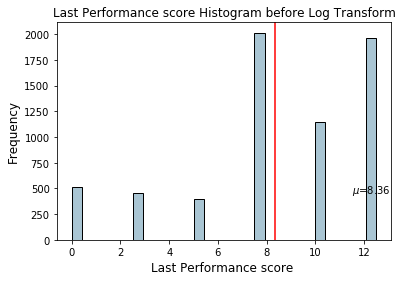

In [98]:
income_log_mean = np.round(np.mean(prom_train['Last_performance_score']), 2)
fig, ax = plt.subplots()
prom_train['Last_performance_score'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Last Performance score Histogram before Log Transform', 
             fontsize=12)
ax.set_xlabel('Last Performance score ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

Text(11.5, 450, '$\\mu$=32.49')

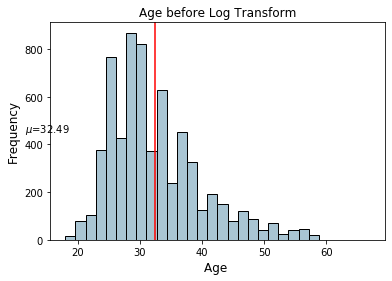

In [99]:
income_log_mean = np.round(np.mean(prom_train['Age']), 2)
fig, ax = plt.subplots()
prom_train['Age'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Age before Log Transform', 
             fontsize=12)
ax.set_xlabel('Age ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
Age = np.array(numerical['Age'])
l, opt_lambda = spstats.boxcox(Age)
numerical['Age'] = spstats.boxcox(numerical['Age'], lmbda=opt_lambda)
numerical['Age'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1.085061
1    1.099832
2    1.070513
3    1.076883
4    1.088937
Name: Age, dtype: float64

Text(0, 0.5, 'Frequency')

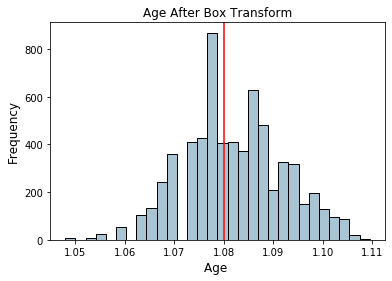

In [101]:
income_log_mean = np.round(np.mean(numerical['Age']), 2)
fig, ax = plt.subplots()
numerical['Age'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Age After Box Transform', 
             fontsize=12)
ax.set_xlabel('Age ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
#ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

Text(11.5, 450, '$\\mu$=5.71')

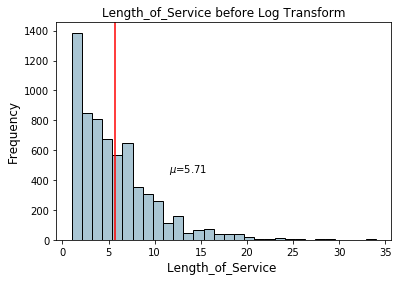

In [102]:
income_log_mean = np.round(np.mean(prom_train['Length_of_Service']), 2)
fig, ax = plt.subplots()
prom_train['Length_of_Service'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Length_of_Service before Log Transform', 
             fontsize=12)
ax.set_xlabel('Length_of_Service ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

In [103]:
Length_of_Service = np.array(numerical['Length_of_Service'])
l, opt_lambda = spstats.boxcox(Length_of_Service)
numerical['Length_of_Service'] = spstats.boxcox(numerical['Length_of_Service'], lmbda=opt_lambda)
numerical['Length_of_Service'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    1.198217
1    3.561504
2    0.000000
3    2.273033
4    0.731952
Name: Length_of_Service, dtype: float64

Text(0, 0.5, 'Frequency')

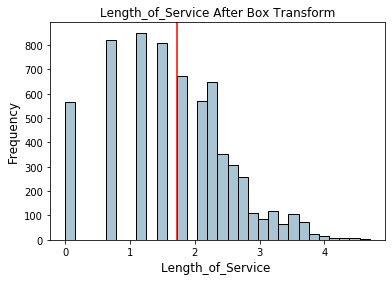

In [104]:
income_log_mean = np.round(np.mean(numerical['Length_of_Service']), 2)
fig, ax = plt.subplots()
numerical['Length_of_Service'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Length_of_Service After Box Transform', 
             fontsize=12)
ax.set_xlabel('Length_of_Service ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
#ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

Text(11.5, 450, '$\\mu$=58.93')

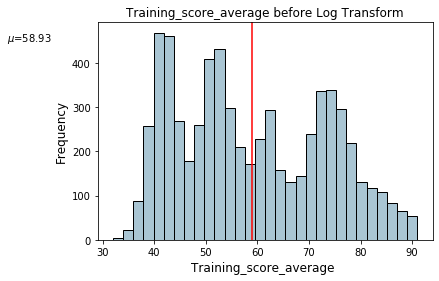

In [105]:
#Training_score_average
income_log_mean = np.round(np.mean(prom_train['Training_score_average']), 2)
fig, ax = plt.subplots()
prom_train['Training_score_average'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Training_score_average before Log Transform', 
             fontsize=12)
ax.set_xlabel('Training_score_average ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

In [106]:
Length_of_Service = np.array(numerical['Training_score_average'])
l, opt_lambda = spstats.boxcox(Length_of_Service)
numerical['Training_score_average'] = spstats.boxcox(numerical['Training_score_average'], lmbda=opt_lambda)
numerical['Training_score_average'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    4.250152
1    4.155070
2    4.551711
3    5.028400
4    4.219182
Name: Training_score_average, dtype: float64

Text(0, 0.5, 'Frequency')

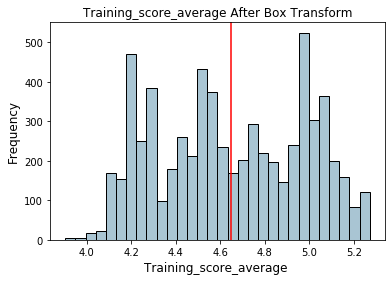

In [107]:
income_log_mean = np.round(np.mean(numerical['Training_score_average']), 2)
fig, ax = plt.subplots()
numerical['Training_score_average'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Training_score_average After Box Transform', 
             fontsize=12)
ax.set_xlabel('Training_score_average ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
#ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

Text(11.5, 450, '$\\mu$=2.23')

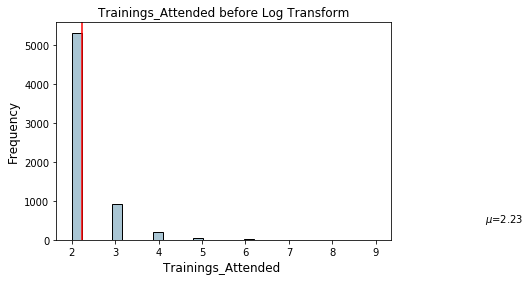

In [108]:
#Trainings_Attended
income_log_mean = np.round(np.mean(prom_train['Trainings_Attended']), 2)
fig, ax = plt.subplots()
prom_train['Trainings_Attended'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('Trainings_Attended before Log Transform', 
             fontsize=12)
ax.set_xlabel('Trainings_Attended ', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)


In [109]:
#numerical_transform = numerical[['Trainings_Attended', 'Last_performance_score', 'Training_score_average', 'Age', 'Length_of_Service']]
numerical.head()

,Trainings_Attended,Last_performance_score,Training_score_average,Age,Length_of_Service
0,2,12.5,4.250152,1.085061,1.198217
1,2,10.0,4.155070,1.099832,3.561504
2,2,0.0,4.551711,1.070513,0.000000
3,2,7.5,5.028400,1.076883,2.273033
4,2,10.0,4.219182,1.088937,0.731952


In [110]:
train_others = prom_train[['Gender', 'Targets_met', 'Previous_Award', 'Foreign_schooled', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement', 'No_of_previous_employers', 'Qualification']]
prom_train['Div_0'] = df_division['Div_0']
prom_train['Div_1'] = df_division['Div_1']
prom_train['Div_2'] = df_division['Div_2']
prom_train['Div_3'] = df_division['Div_3']
prom_train['Div_4'] = df_division['Div_4']
prom_train['Div_5'] = df_division['Div_5']
prom_train['Div_6'] = df_division['Div_6']
prom_train['Div_7'] = df_division['Div_7']
prom_train['Div_8'] = df_division['Div_8']
prom_train['Reg_0'] = df_Region['Reg_0']
prom_train['Reg_1'] = df_Region['Reg_1']
prom_train['Reg_2'] = df_Region['Reg_2']
prom_train['Reg_3'] = df_Region['Reg_3']
prom_train['Reg_4'] = df_Region['Reg_4']
prom_train['Reg_5'] = df_Region['Reg_5']
prom_train['Channel_0'] = df_Channel['Channel_0']
prom_train['Channel_1'] = df_Channel['Channel_1']
prom_train['Channel_2'] = df_Channel['Channel_2']
prom_train['Marital_0'] = df_Marital['Marital_0']
prom_train['Marital_1'] = df_Marital['Marital_1']
prom_train['Marital_2'] = df_Marital['Marital_2']
prom_train['Trainings_Attended'] = numerical['Trainings_Attended']
prom_train['Last_performance_score'] = numerical['Last_performance_score']
prom_train['Training_score_average'] = numerical['Training_score_average']
prom_train['Age'] = numerical['Age']
prom_train['Length_of_Service'] = numerical['Length_of_Service']
prom_train['Promoted_or_Not']
prom_train = prom_train[['Qualification', 'Gender', 'Div_0', 'Div_1', 'Div_2', 'Div_3', 'Div_4', 'Div_5', 'Div_6', 'Div_7', 'Div_8', 'Reg_0', 'Reg_1', 'Reg_2', 'Reg_3', 'Reg_4', 'Reg_5', 'Channel_0', 'Channel_1', 'Channel_2', 'Marital_0', 'Marital_1', 'Marital_2', 'Trainings_Attended', 'Last_performance_score', 'Targets_met', 'Previous_Award', 'Training_score_average', 'Foreign_schooled', 'Past_Disciplinary_Action', 'Previous_IntraDepartmental_Movement', 'Age', 'Length_of_Service', 'No_of_previous_employers', 'Promoted_or_Not']]
prom_train.head(1)

,Qualification,Gender,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,...,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Age,Length_of_Service,No_of_previous_employers,Promoted_or_Not
0,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,4.250152,1,0,0,1.085061,1.198217,0,1


In [111]:
# Place the DataFrames side by side
train_data = prom_train
train_data.head(7)

,Qualification,Gender,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,...,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Age,Length_of_Service,No_of_previous_employers,Promoted_or_Not
0,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,4.250152,1,0,0,1.085061,1.198217,0,1
1,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,4.155070,1,0,0,1.099832,3.561504,1,1
2,2,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,4.551711,0,0,0,1.070513,0.000000,0,1
3,2,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,5.028400,0,0,0,1.076883,2.273033,0,1
4,3,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,4.219182,1,0,0,1.088937,0.731952,1,1
5,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,4.647006,1,0,0,1.074908,0.000000,1,1
6,3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,4.526840,1,0,0,1.093250,2.907116,1,1


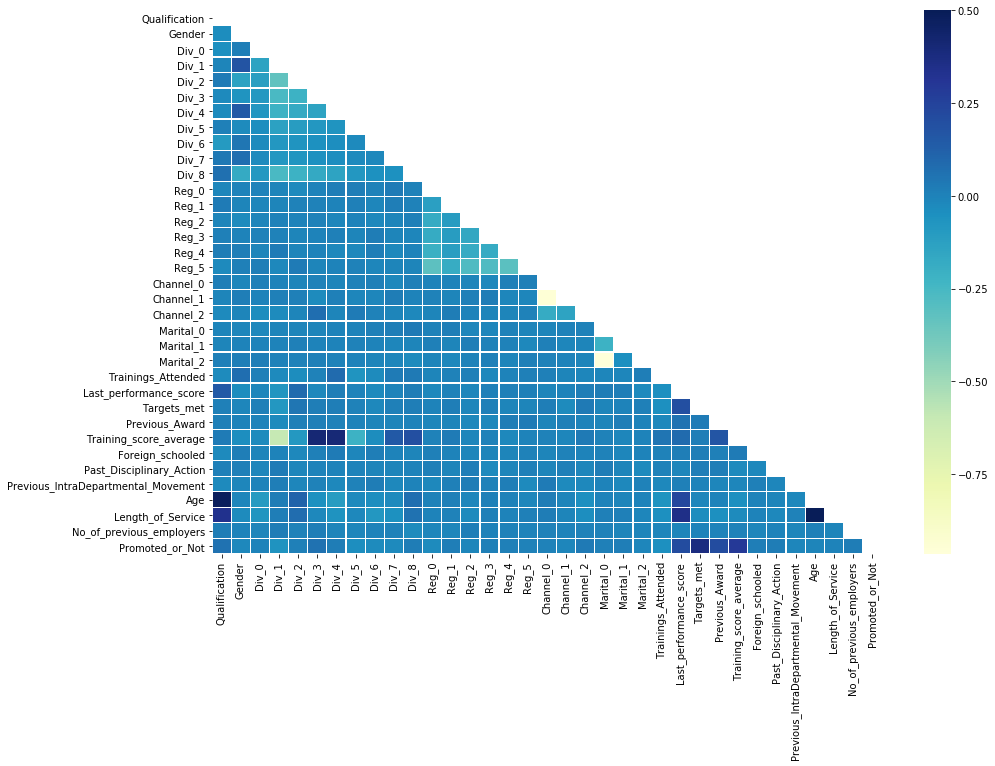

In [112]:
# Calculate correlations
corr = train_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

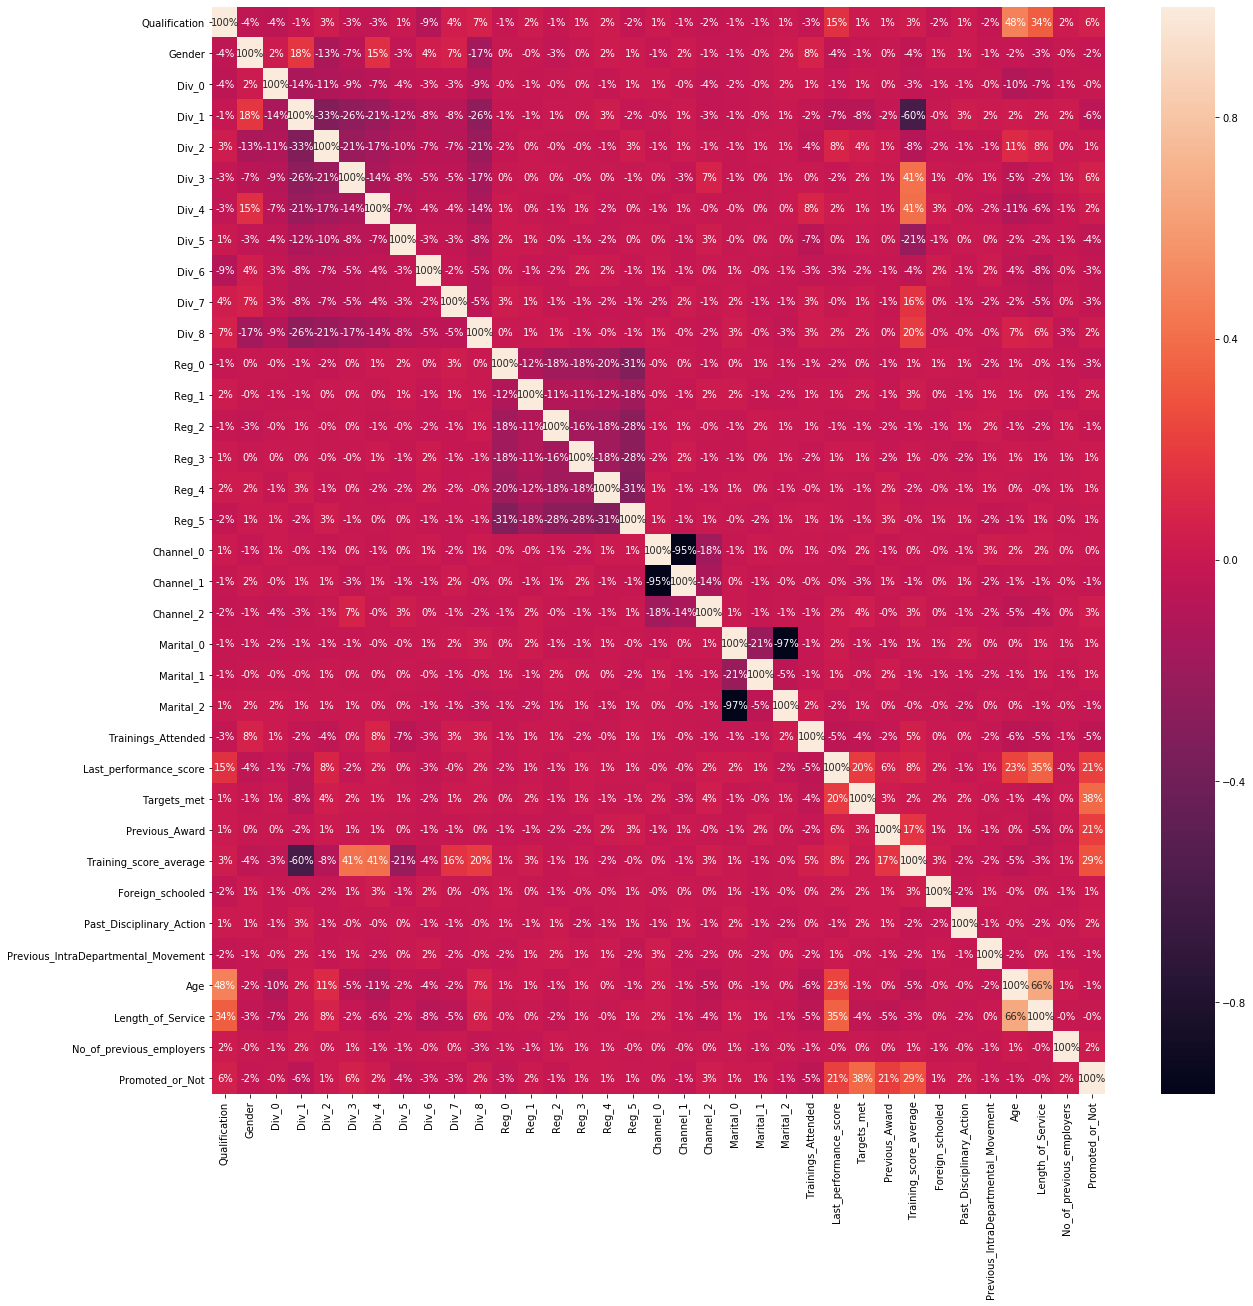

In [113]:
import seaborn as sns
#Visualize the correlation
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, fmt='.0%')

In [114]:
#Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
Prom_col = list(train_data.columns)
Prom_col.remove('Promoted_or_Not')
for col in Prom_col:
    train_data[col] = train_data[col].astype(float)
    train_data[[col]] = scaler.fit_transform(train_data[[col]])
train_data['Promoted_or_Not'] = pd.to_numeric(train_data['Promoted_or_Not'], downcast='float') 
train_data.head(3)

,Qualification,Gender,Div_0,Div_1,Div_2,Div_3,Div_4,Div_5,Div_6,Div_7,...,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,Age,Length_of_Service,No_of_previous_employers,Promoted_or_Not
0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.253457,1.0,0.0,0.0,0.602939,0.254965,0.000000,1.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.183924,1.0,0.0,0.0,0.843381,0.757842,0.166667,1.0
2,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.473989,0.0,0.0,0.0,0.366115,0.000000,0.000000,1.0


In [115]:
#The data is exported for use in the modelling section
#train_data.to_csv (r'C:\Users\OLUMEGBON ISMAIL\Desktop\Jupyter\Data_Science_Kaggle\train_dataframe2.csv', index = None, header=True)

In [116]:
#The data is exported for use in the modelling section
train_data.to_csv (r'C:\Users\OLUMEGBON ISMAIL\Desktop\Jupyter\Data_Science_Kaggle\train_downsampled.csv', index = None, header=True)

In [117]:
train_data.shape

(6482, 35)

In [120]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=7, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

